 Исследовательское задание: малоранговая аппроксимация матрицы. Сгенерируйте случайную квадратную матрицу A ∈ R
n×n, n ≥ 100. Выполните сингулярное разложение этой матрицы, и получите три
матрицы: U, S, V
⊤. Выполняйте аппроксимацию матрицы A с рангом r, меняя его значение, например,
от 2 до n:
$$\tilde{A} = U[:,:r] S[:r] V^{\top} [:r, :] $$
и каждый раз считайте ошибку апроксимации (как восстановленная матрица отличается от исходной):
$$E(r) = ||A − \tilde{A}||_F = \sqrt {\sum_{i=1}^n \sum_{j=1}^n (a_{ij}-\tilde{a_{ij}})^2} $$
Используя библиотеку matplotlib, постройте график зависимости ошибки аппроксимации матрицы от
ранга r.

In [2]:
import numpy as np
import numpy.linalg as la
float_formatter = lambda x: "%.3f" % x
import matplotlib.pyplot as plt
from utils import *
import PIL
%matplotlib inline

In [3]:
r0 = 100
rand_matrix = np.random.rand(r0,r0)

Text(0.5, 1.05, 'Изображение шума 100x100')

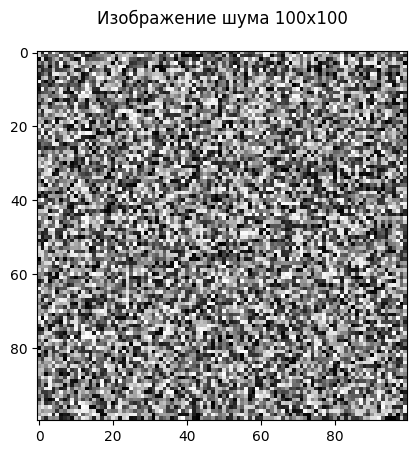

In [4]:
plt.imshow(rand_matrix, cmap='gray')
plt.title(f'Изображение шума {r0}x{r0}', y=1.05)

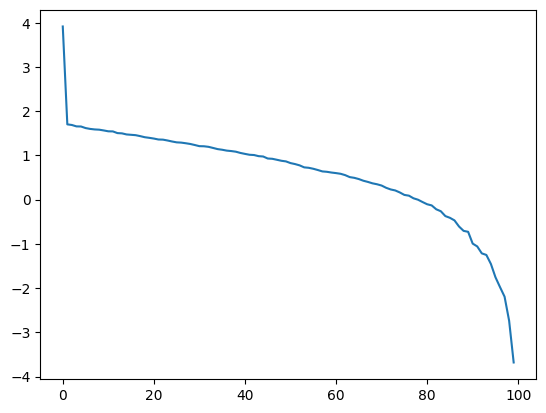

In [5]:
# SVD 
U, s, VT = la.svd(rand_matrix)
plt.plot(np.log(s))

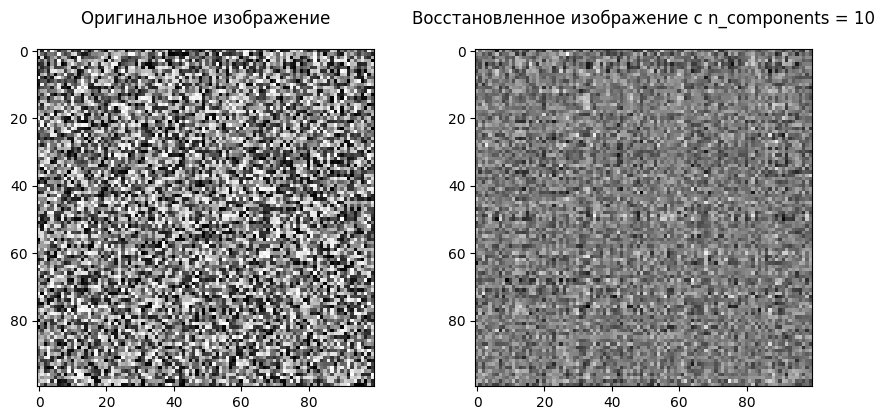

In [17]:
Sigma = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
r = 10
mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(rand_matrix, cmap='gray')
ax1.set_title("Оригинальное изображение", y=1.05)

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title(f'Восстановленное изображение с n_components = {r}', y=1.05)

plt.show()

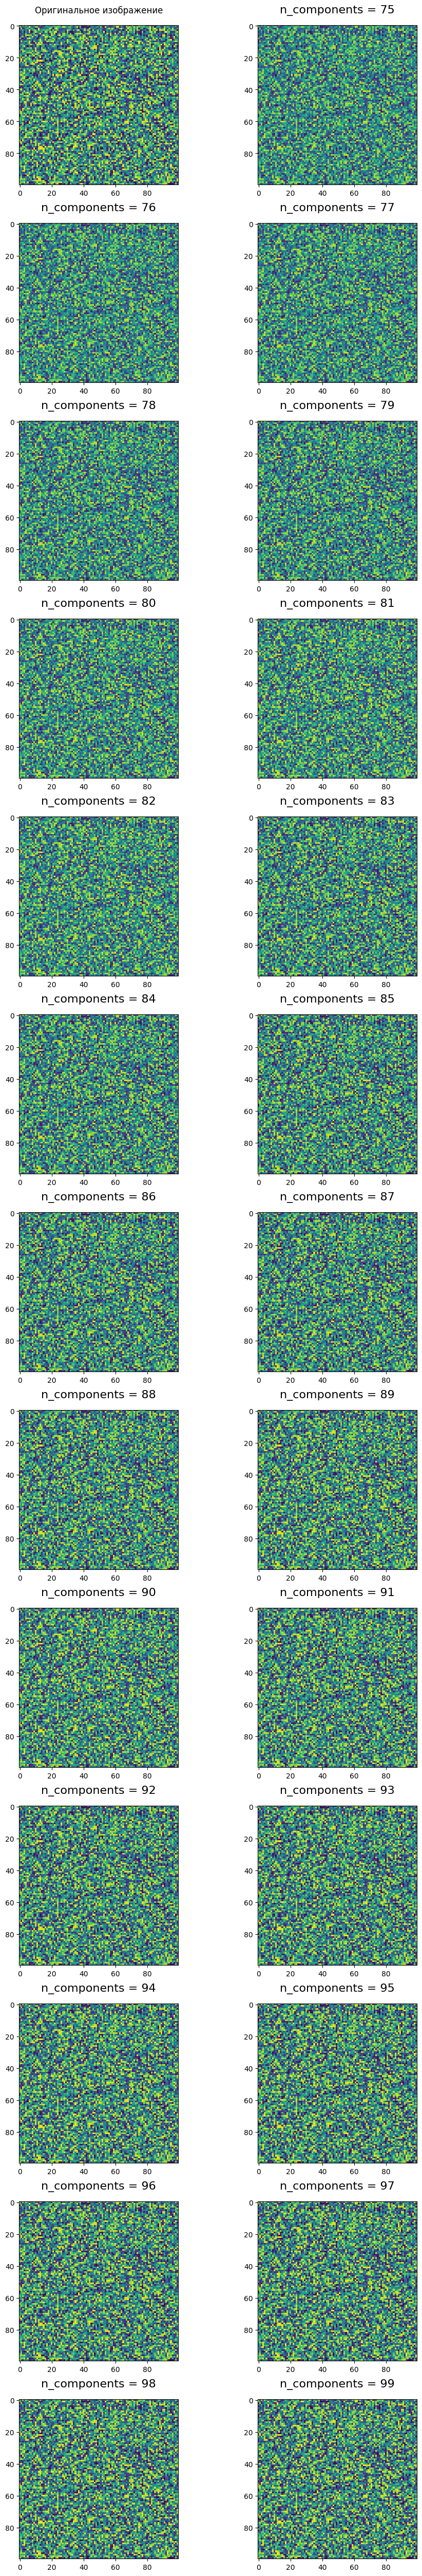

In [7]:
k=75
n = int(np.ceil((r0-k+1)/2))
fig, axes = plt.subplots(n, 2, figsize=(10,n*5))
axes[0, 0].imshow(rand_matrix)
axes[0, 0].set_title("Оригинальное изображение", y=1.05)
plt.subplots_adjust(wspace=0.5, hspace=0.001)
for r in range(k, r0):
    i = r0-r
    c=r-k+1
    mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]
    axes[c // 2, c % 2].imshow(mat_approx)
    axes[c // 2, c % 2].set_title(f'n_components = {r}', y=1.05, fontsize=16)
plt.show()

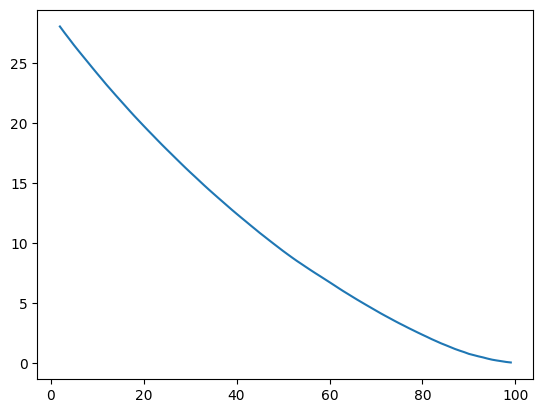

In [16]:
k=2
x=[]
y=[]
for r in range(k, r0):
    i = r0-r
    x.append(r)
    mat_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]
    dist = np.linalg.norm(rand_matrix-mat_approx)
    y.append(dist)
plt.plot(x,y)